<a href="https://colab.research.google.com/github/dhans2007/ML_LAB/blob/main/MLEXP3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML LAB EXPERIMENT -3**
DHANESH VC
24BAD018

# **SCENARIO 1 – MULTILINEAR REGRESSION**

**Problem Statement**

Predict student academic performance based on academic, behavioral, and lifestyle factors.

Dataset (Kaggle – Public)

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

Target Variable

Final Exam Score (Average of Math, Reading, Writing)

Input Features

Study hours per day

Attendance percentage

Parental education level (encoded)

Test preparation course (encoded)

Sleep hours



# **IN-LAB TASKS (Multilinear Regression)**

Import required Python libraries.

Load the student performance dataset.

Perform data preprocessing and encoding of categorical features.

Select multiple input features and compute the target variable.

Handle missing values using suitable imputation.

Apply feature scaling.

Split the dataset into training and testing sets.

Train a Multilinear Regression model.

Predict student performance for test data.

**Evaluate performance using:**

MSE

RMSE

R² Score

Analyze regression coefficients to interpret feature influence.

**Optimize the model using:**

Feature elimination

Ridge and Lasso regularization



**Visualization**

Predicted vs Actual exam scores

Coefficient magnitude comparison

Residual distribution plot

In [148]:
#DHANESH VC 24BAD018
#1.import required Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [149]:
#DHANESH VC 24BAD018
#2.	Load the student performance dataset.
df=pd.read_csv("/StudentsPerformance.csv")
df.head()
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

In [150]:
#DHANESH VC 24BAD018
#3.	Perform data preprocessing and encoding of categorical features.
le = LabelEncoder()

df['parental level of education'] = le.fit_transform(
    df['parental level of education']
)

df['test preparation course'] = le.fit_transform(
    df['test preparation course']
)
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['lunch'] = le.fit_transform(df['lunch'])

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [151]:
#DHANESH VC 24BAD018

np.random.seed(42)

df["Study_Hours"] = np.random.randint(1, 10, size=len(df))      # 1 to 9 hours
df["Attendance"] = np.random.randint(60, 101, size=len(df))     # 60% to 100%
df["Sleep_Hours"] = np.random.randint(4, 10, size=len(df))      # 4 to 9 hours

df[["Study_Hours", "Attendance", "Sleep_Hours"]].head()

,Study_Hours,Attendance,Sleep_Hours
0,7,83,8
1,4,82,9
2,8,67,7
3,5,96,4
4,7,62,5


In [152]:
#DHANESH VC 24BAD018
#4.	Select multiple input features and compute the target variable.
df["Final_Score"] = (df["math score"] + df["reading score"] + df["writing score"]) / 3
df[["math score", "reading score", "writing score", "Final_Score"]].head()

,math score,reading score,writing score,Final_Score
0,72,72,74,72.666667
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333


In [153]:
#DHANESH VC 24BAD018

features = [ "gender",'race/ethnicity',"parental level of education",'lunch',
            "test preparation course"]

X = df.drop(['Final_Score', 'reading score', 'writing score'],axis=1)
y = df["Final_Score"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 9)
y shape: (1000,)


In [154]:
#Handle Missing Values Using Suitable Imputation
#DHANESH VC 24BAD018
print("Missing values:\n", X.isnull().sum())
X.fillna(X.mean(), inplace=True)
print("Missing values after filling:\n", X.isnull().sum())

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
Study_Hours                    0
Attendance                     0
Sleep_Hours                    0
dtype: int64
Missing values after filling:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
Study_Hours                    0
Attendance                     0
Sleep_Hours                    0
dtype: int64


In [155]:
#Apply Feature Scaling
#DHANESH VC 24BAD018
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature Scaling Done")

Feature Scaling Done


In [156]:
#DHANESH VC 24BAD018
#Split Dataset into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (800, 9)
Testing data size: (200, 9)


In [157]:
#DHANESH VC 24BAD018
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Training Completed")

Model Training Completed


In [158]:
#DHANESH VC 24BAD018
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 11.752866157061446
RMSE: 3.428245346684138
R2 Score: 0.9451739777344255


In [159]:
#DHANESH VC 24BAD018
features_for_coeff = X.columns.tolist()

coeff_df = pd.DataFrame({
    "Feature": features_for_coeff,
    "Coefficient": model.coef_
})

print(coeff_df)

                       Feature  Coefficient
0                       gender    -4.154808
1               race/ethnicity    -0.367161
2  parental level of education    -0.267132
3                        lunch    -0.636560
4      test preparation course    -1.182173
5                   math score    13.773985
6                  Study_Hours     0.025211
7                   Attendance    -0.059713
8                  Sleep_Hours    -0.243661


Text(0.5, 1.0, 'Actual vs Predicted Values')

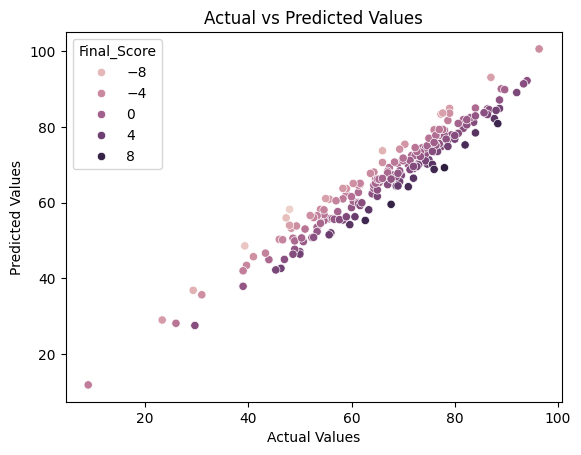

In [160]:
sns.scatterplot(x=y_test,y=y_pred,hue=y_test-y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

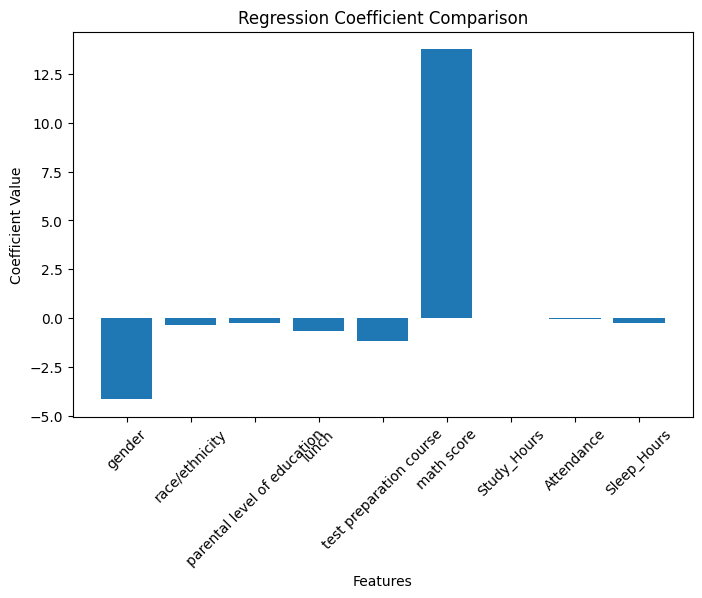

In [161]:
#DHANESH VC 24BAD018
plt.figure(figsize=(8,5))
plt.bar(coeff_df["Feature"], coeff_df["Coefficient"])
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Regression Coefficient Comparison")
plt.xticks(rotation=45)
plt.show()

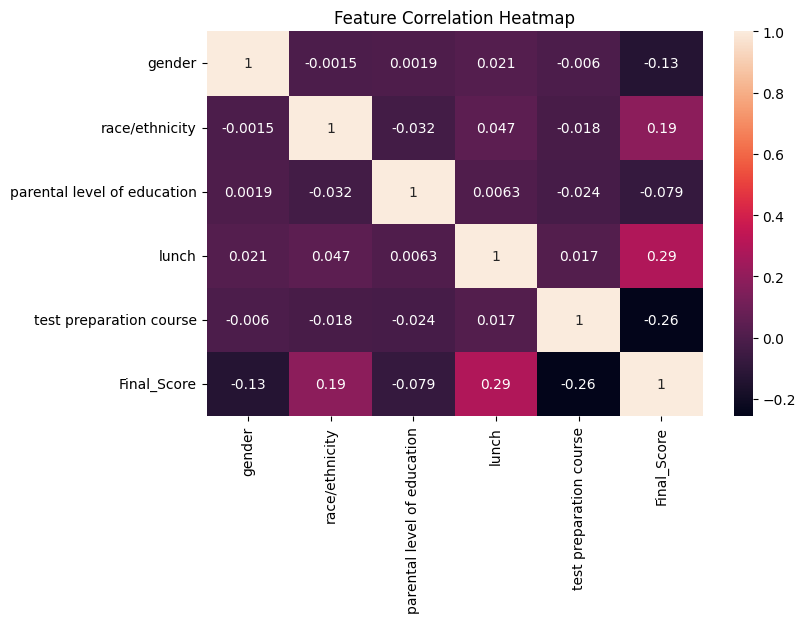

R2 Score after feature elimination: 0.026250137046799238


/tmp/ipython-input-2425804513.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new.fillna(X_new.mean(), inplace=True)


In [162]:
#DHANESH VC 24BAD018
corr = df[features + ["Final_Score"]].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

features_new = ["Study_Hours", "Attendance", "parental level of education", "test preparation course"]

X_new = df[features_new]
X_new.fillna(X_new.mean(), inplace=True)

X_new_scaled = scaler.fit_transform(X_new)

X_train, X_test, y_train, y_test = train_test_split(
    X_new_scaled, y, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print("R2 Score after feature elimination:", r2_score(y_test, y_pred2))

In [163]:
#DHANESH VC 24BAD018
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

print("Ridge R2 Score:", r2_score(y_test, ridge_pred))

Ridge R2 Score: 0.02628517234948813


In [164]:
#DHANESH VC 24BAD018
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

print("Lasso R2 Score:", r2_score(y_test, lasso_pred))

Lasso R2 Score: 0.026803364112847006
